# 5.2 탐색적 데이터 분석

## 5.2.1 KBO/팬그래프 데이터에 기록된 야구 지표 분석

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
print(matplotlib.__version__)
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(sm.__version__)

3.2.2
1.18.5
1.0.5
0.10.1
0.11.1


In [2]:
!python -V

Python 3.8.3


In [3]:
import pandas as pd

#데이터셋 불러오기 
atKbo_11_18_KboRegSsn = pd.read_csv("C://users/hym97/스카우트/kbo_yearly_foreigners_2011_2018.csv")

atKbo_11_18_MlbTot = pd.read_csv("C://users/hym97/스카우트/fangraphs_foreigners_2011_2018.csv")

atKbo_19_MlbTot = pd.read_csv("C://users/hym97/스카우트/fangraphs_foreigners_2019.csv")

In [4]:
print(atKbo_11_18_KboRegSsn.shape)
print(atKbo_11_18_MlbTot.shape)
print(atKbo_19_MlbTot.shape)

(105, 11)
(205, 19)
(41, 19)


In [5]:

print(atKbo_11_18_KboRegSsn.columns)
print(atKbo_11_18_MlbTot.columns)
print(atKbo_19_MlbTot.columns)

Index(['pitcher_name', 'year', 'team', 'ERA', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'year_born'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')


              ERA         TBF
count  105.000000  105.000000
mean     4.714286  558.980952
std      1.733072  224.436816
min      2.380000   40.000000
25%      3.740000  349.000000
50%      4.420000  622.000000
75%      5.230000  758.000000
max     15.750000  870.000000


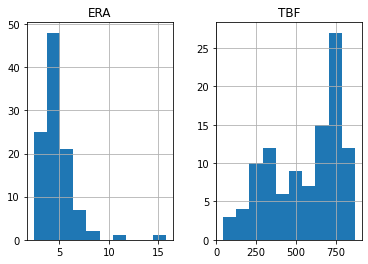

In [6]:

atKbo_11_18_KboRegSsn[['ERA', 'TBF']].hist()
print(atKbo_11_18_KboRegSsn[['ERA', 'TBF']].describe())

              ERA         TBF
count  205.000000  205.000000
mean     5.750585  193.160976
std      3.404285  186.000312
min      0.000000    4.000000
25%      4.050000   57.000000
50%      5.200000  126.000000
75%      6.750000  263.000000
max     27.000000  827.000000


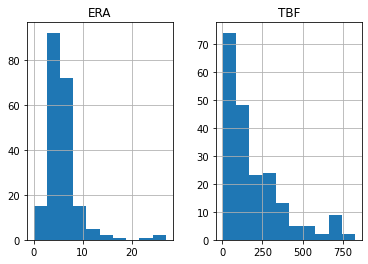

In [7]:

atKbo_11_18_MlbTot[['ERA', 'TBF']].hist()
print(atKbo_11_18_MlbTot[['ERA', 'TBF']].describe())

In [8]:
m_mean = (atKbo_11_18_MlbTot.groupby('pitcher_name')['ERA'].
          mean().
          reset_index().
          rename(columns={'ERA':'MLB_mean'}))
k_mean = (atKbo_11_18_KboRegSsn.groupby('pitcher_name')['ERA'].
          mean().
          reset_index().
          rename(columns={'ERA':'KBO_mean'}))

df = pd.merge(m_mean, k_mean, how = 'inner', on= 'pitcher_name')

df.head()

,pitcher_name,MLB_mean,KBO_mean
0,니퍼트,4.290000,3.6875
1,다이아몬드,10.262500,4.4200
2,듀브론트,5.106667,4.9200
3,레나도,7.306667,6.8000
4,레온,6.050000,11.2500


          MLB_mean  KBO_mean
MLB_mean  1.000000  0.107744
KBO_mean  0.107744  1.000000


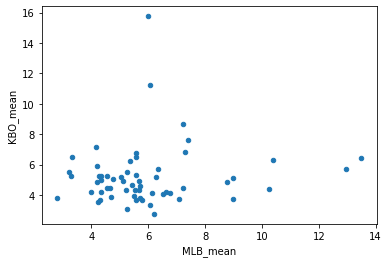

In [9]:

df.plot(kind = 'scatter', x = 'MLB_mean', y = 'KBO_mean')
print(df.corr())

## 5.2.2 스탯캐스트 데이터에 기록된 야구 지표 분석

In [10]:
atKbo_11_18_StatCast = pd.read_csv("C://users/hym97/스카우트/baseball_savant_foreigners_2011_2018.csv")

atKbo_19_StatCast = pd.read_csv("C://users/hym97/스카우트/baseball_savant_foreigners_2019.csv")

print(atKbo_11_18_StatCast.shape)
print(atKbo_19_StatCast.shape)

(135753, 24)
(21903, 24)


In [11]:
print(atKbo_11_18_StatCast.columns)
print(atKbo_19_StatCast.columns)

Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')
Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')


In [12]:
atKbo_11_18_StatCast[['events', 'description', 'pitch_name']]

,events,description,pitch_name
0,field_out,hit_into_play,4-Seam Fastball
1,home_run,hit_into_play_score,4-Seam Fastball
2,NaN,foul,4-Seam Fastball
3,NaN,blocked_ball,4-Seam Fastball
4,NaN,ball,4-Seam Fastball
...,...,...,...
135748,NaN,ball,4-Seam Fastball
135749,field_out,hit_into_play,Cutter
135750,NaN,called_strike,Cutter
135751,NaN,ball,4-Seam Fastball


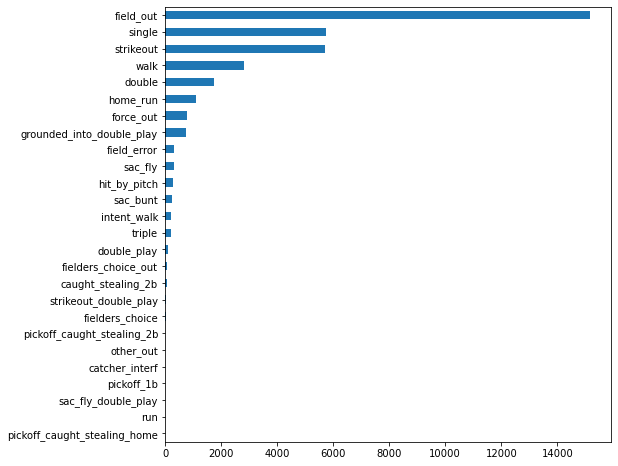

In [13]:
(atKbo_11_18_StatCast['events'].
 value_counts().
 sort_values(ascending = True).
 plot(kind = 'barh', figsize=(8, 8)))

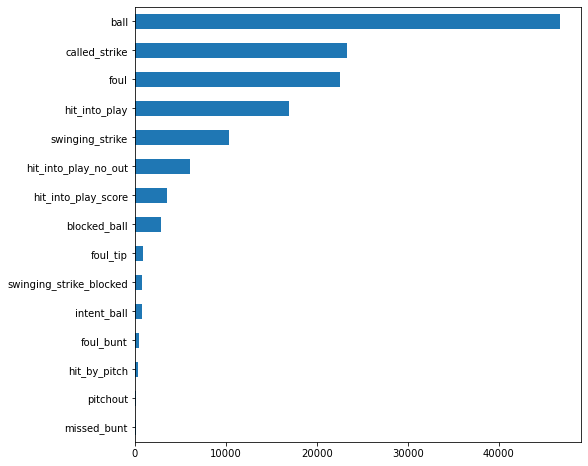

In [14]:
(atKbo_11_18_StatCast['description'].
 value_counts().
 sort_values(ascending = True).
 plot(kind = 'barh', figsize=(8, 8)))


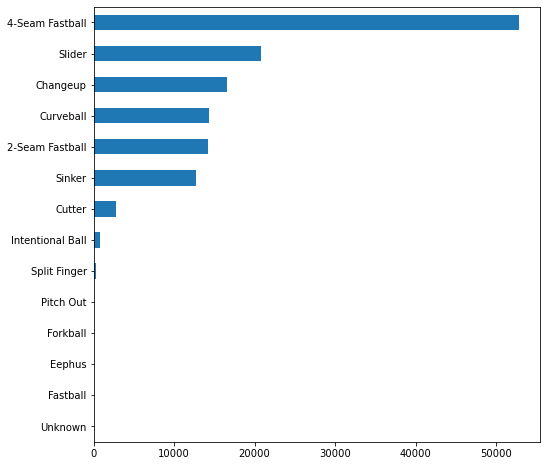

In [15]:
(atKbo_11_18_StatCast['pitch_name'].
 value_counts().
 sort_values(ascending = True).
 plot(kind = 'barh', figsize=(8, 8)))

# 5.3 데이터 전처리

## 5.3.1 가설을 확인하기 위한 투수 집단 선정하기

In [16]:
atKbo_11_18_KboRegSsn.head(10)

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
1,니퍼트,2012,두산,3.20,785,156,15,68,8,126,NaN
2,니퍼트,2013,두산,3.58,482,108,7,34,4,104,NaN
3,니퍼트,2014,두산,3.81,760,186,17,48,6,158,NaN
4,니퍼트,2015,두산,5.10,404,104,4,33,4,76,NaN
5,니퍼트,2016,두산,2.95,701,151,15,57,9,142,NaN
6,니퍼트,2017,두산,4.06,782,175,20,77,10,161,NaN
7,니퍼트,2018,KT,4.25,765,209,26,39,9,165,NaN
8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
9,듀브론트,2018,롯데,4.92,629,162,13,62,8,109,NaN


In [17]:
atKbo_11_18_MlbTot.head(10)

,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
0,오간도,2011.0,3.51,3.3,693.0,149.0,16.0,43.0,7.0,126.0,1.14,0.265,3.65,0.237,0.364,0.674,0.147,0.090,0.475
1,험버,2011.0,3.75,3.2,676.0,151.0,14.0,41.0,6.0,116.0,1.18,0.275,3.58,0.168,0.471,0.458,0.094,0.092,0.463
2,루카스,2012.0,3.76,2.8,827.0,185.0,13.0,78.0,1.0,140.0,1.36,0.289,3.75,0.203,0.572,0.707,0.082,0.062,0.424
3,다이아몬드,2012.0,3.54,2.2,714.0,184.0,17.0,31.0,4.0,90.0,1.24,0.292,3.94,0.210,0.534,0.597,0.040,0.068,0.467
4,듀브론트,2013.0,4.32,2.2,705.0,161.0,13.0,71.0,5.0,139.0,1.43,0.310,3.78,0.199,0.456,0.633,0.127,0.077,0.434
5,스와잭,2017.0,2.33,2.2,303.0,58.0,6.0,22.0,2.0,91.0,1.03,0.286,2.74,0.155,0.439,0.485,0.145,0.142,0.500
6,듀브론트,2012.0,4.86,1.3,709.0,162.0,24.0,71.0,5.0,167.0,1.45,0.312,4.37,0.234,0.437,0.635,0.086,0.096,0.442
7,탈보트,2010.0,4.41,1.2,696.0,169.0,13.0,69.0,8.0,88.0,1.49,0.301,4.48,0.169,0.478,0.495,0.070,0.060,0.428
8,비야누에바,2011.0,4.04,1.2,454.0,103.0,11.0,32.0,4.0,68.0,1.26,0.271,4.10,0.219,0.356,0.462,0.151,0.078,0.433
9,비야누에바,2014.0,4.64,1.2,343.0,89.0,6.0,19.0,3.0,72.0,1.39,0.342,3.13,0.202,0.413,0.474,0.161,0.113,0.486


In [18]:
atKbo_11_18_StatCast.head(10)

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,...,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name
0,2010-10-09,93.0,425834.0,430962,field_out,hit_into_play,4.0,R,R,popup,...,-0.626,2.771,-6.404,26.077,-9.694,NaN,NaN,NaN,4-Seam Fastball,니퍼트
1,2010-10-09,95.2,150289.0,430962,home_run,hit_into_play_score,5.0,L,R,fly_ball,...,-0.112,2.401,-10.168,28.786,-8.895,NaN,NaN,NaN,4-Seam Fastball,니퍼트
2,2010-10-09,94.3,150289.0,430962,NaN,foul,2.0,L,R,NaN,...,0.272,3.052,-5.605,26.657,-7.794,NaN,NaN,NaN,4-Seam Fastball,니퍼트
3,2010-10-09,94.0,150289.0,430962,NaN,blocked_ball,13.0,L,R,NaN,...,-1.193,0.632,-9.099,30.273,-6.371,NaN,NaN,NaN,4-Seam Fastball,니퍼트
4,2010-10-09,92.8,150289.0,430962,NaN,ball,14.0,L,R,NaN,...,0.370,1.383,-5.846,27.290,-11.262,NaN,NaN,NaN,4-Seam Fastball,니퍼트
5,2010-10-09,80.8,150289.0,430962,NaN,foul_tip,13.0,L,R,NaN,...,-1.233,2.059,-10.897,18.539,-20.286,NaN,NaN,NaN,Changeup,니퍼트
6,2010-10-09,92.0,150289.0,430962,NaN,ball,9.0,L,R,NaN,...,0.510,1.722,-6.251,27.786,-10.031,NaN,NaN,NaN,4-Seam Fastball,니퍼트
7,2010-10-09,92.5,430632.0,430962,field_out,hit_into_play,13.0,L,R,line_drive,...,-1.010,2.212,-8.279,26.466,-8.376,NaN,NaN,NaN,4-Seam Fastball,니퍼트
8,2010-10-09,91.2,430632.0,430962,NaN,ball,13.0,L,R,NaN,...,-0.106,1.418,-9.239,25.490,-13.556,NaN,NaN,NaN,4-Seam Fastball,니퍼트
9,2010-10-09,91.8,430632.0,430962,NaN,ball,11.0,L,R,NaN,...,-1.426,2.971,-12.090,25.659,-15.250,NaN,NaN,NaN,2-Seam Fastball,니퍼트


In [19]:
print('KBO:', len(atKbo_11_18_KboRegSsn['pitcher_name'].unique()))
print('MLB:', len(atKbo_11_18_MlbTot['pitcher_name'].unique()))
print('StatCast:', len(atKbo_11_18_StatCast['pitcher_name'].unique()))

KBO: 62
MLB: 60
StatCast: 60


In [20]:
target = (set(atKbo_11_18_KboRegSsn['pitcher_name']) & 
          set(atKbo_11_18_MlbTot['pitcher_name']) &
          set(atKbo_11_18_StatCast['pitcher_name']))

print(type(target)) 

target = sorted(list(target))

print(type(target)) 

print(len(target))

<class 'set'>
<class 'list'>
57


In [21]:
_idx = atKbo_11_18_KboRegSsn.query('pitcher_name in @target'). \
    groupby('pitcher_name')['year'].idxmin().values
firstYearInKBO_11_18 = atKbo_11_18_KboRegSsn.loc[_idx,:]
firstYearInKBO_11_18.head()

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
9,듀브론트,2018,롯데,4.92,629,162,13,62,8,109,NaN
10,레나도,2017,삼성,6.80,243,70,11,27,6,28,NaN
11,레온,2016,삼성,11.25,40,16,2,1,1,7,NaN


## 5.3.2 유효한 데이터 선정하기

In [22]:
TBF_median = firstYearInKBO_11_18['TBF'].median()
ERA_median = firstYearInKBO_11_18['ERA'].median()
Elite_11_18 = firstYearInKBO_11_18.query('TBF >= @TBF_median & ERA <= @ERA_median')
Elite_11_18

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
12,레이예스,2013,SK,4.84,751,157,15,91,7,135,NaN
14,레일리,2015,롯데,3.91,768,182,20,57,15,134,1988년 06월 29일
25,린드블럼,2015,롯데,3.56,861,196,28,52,12,180,1987년 06월 15일
37,보우덴,2016,두산,3.80,742,159,17,54,6,160,NaN
43,샘슨,2018,한화,4.68,703,144,17,79,5,195,NaN
45,세든,2013,SK,2.98,780,169,14,73,11,160,NaN
48,소사,2012,KIA,3.54,614,137,9,39,8,104,NaN
67,웨버,2014,NC,4.58,512,132,13,42,3,85,NaN


# 5.4 모델 구축과 검증

## 5.4.1 선형 회귀 분석

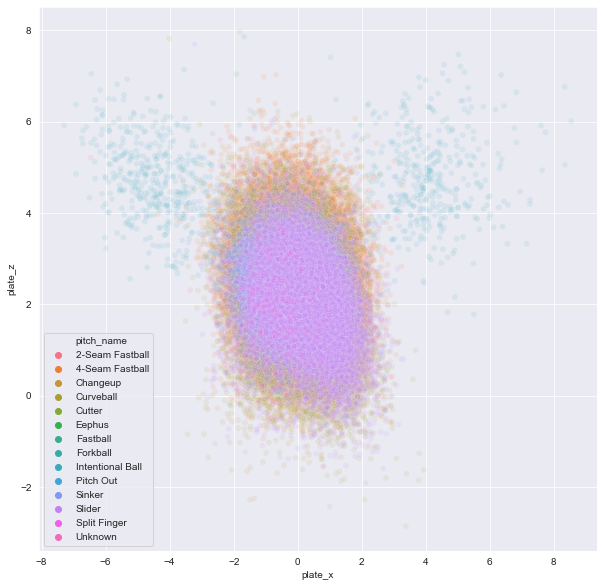

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
sns.set_style('darkgrid')
sns.scatterplot(data = atKbo_11_18_StatCast.sort_values('pitch_name'), 
                x = 'plate_x', 
                y = 'plate_z', 
                hue = 'pitch_name', 
                alpha = 0.1)
plt.show()

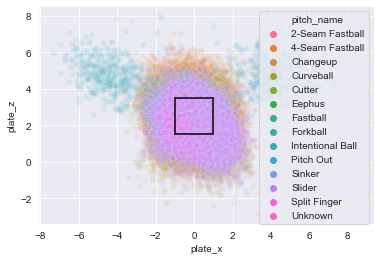

In [25]:
sns.set_style('darkgrid')
sns.scatterplot(data = atKbo_11_18_StatCast.sort_values('pitch_name'), 
                x = 'plate_x', 
                y = 'plate_z', 
                hue = 'pitch_name', 
                alpha = 0.1)
plt.plot([-1, -1], [1.5, 3.5], 'black')
plt.plot([1, 1], [1.5, 3.5], 'black')
plt.plot([-1, 1], [1.5, 1.5], 'black')
plt.plot([-1, 1], [3.5, 3.5], 'black')
plt.show()

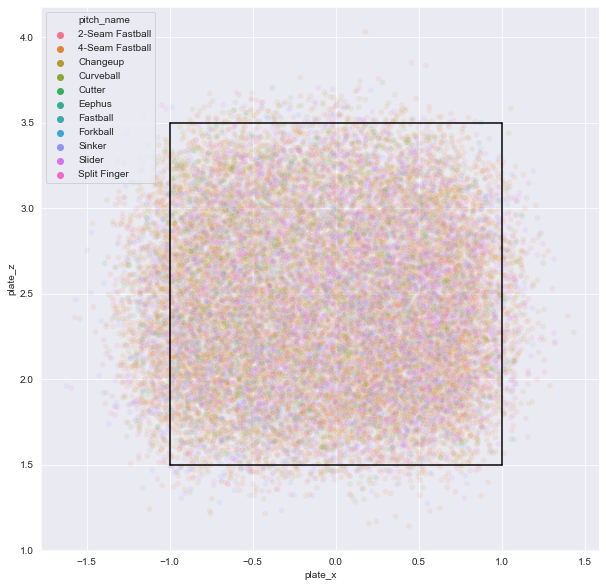

In [26]:
plt.figure(figsize = (10,10))
sns.set_style('darkgrid')
sns.scatterplot(data = (atKbo_11_18_StatCast.
                        sort_values('pitch_name').
                        query('description == "called_strike"')), 
                x = 'plate_x', 
                y = 'plate_z', 
                hue = 'pitch_name', 
                alpha = 0.1)
plt.plot([-1, -1], [1.5, 3.5], 'black')
plt.plot([1, 1], [1.5, 3.5], 'black')
plt.plot([-1, 1], [1.5, 1.5], 'black')
plt.plot([-1, 1], [3.5, 3.5], 'black')
plt.show()

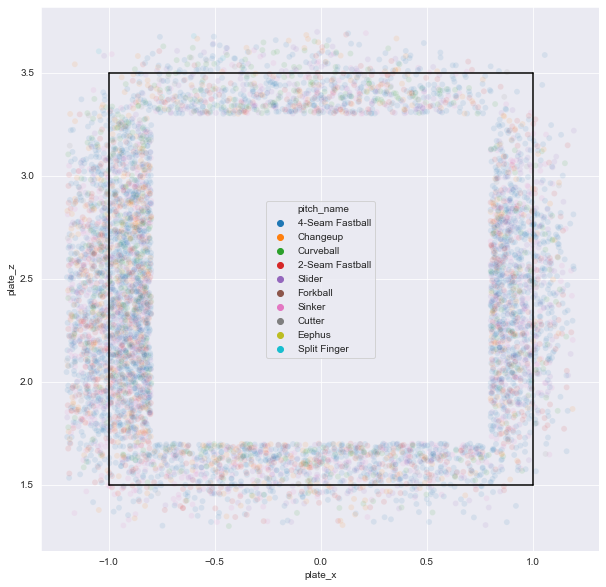

In [27]:
edgePitches = \
(atKbo_11_18_StatCast.query(
'(plate_x >= 0.8 & plate_x <= 1.2 & plate_z <= 3.7 & plate_z >= 1.3) | \
 (plate_x <= -0.8 & plate_x >= -1.2 & plate_z <= 3.7 & plate_z >= 1.3) | \
 (plate_x >= -0.8 & plate_x <= 0.8 & plate_z <= 1.7 & plate_z >= 1.3) | \
 (plate_x >= -0.8 & plate_x <= 0.8 & plate_z <= 3.7 & plate_z >= 3.3)').
               query('pitch_name.notnull()', engine='python').
               query('description == "called_strike"'))

plt.figure(figsize = (10,10))
sns.set_style('darkgrid')
sns.scatterplot(data = edgePitches,
                x = 'plate_x', 
                y = 'plate_z', 
                hue = 'pitch_name', 
                alpha = 0.1)
plt.plot([-1, -1], [1.5, 3.5], 'black')
plt.plot([1, 1], [1.5, 3.5], 'black')
plt.plot([-1, 1], [1.5, 1.5], 'black')
plt.plot([-1, 1], [3.5, 3.5], 'black')
plt.show()

In [28]:
(edgePitches[['pitcher_name', 'pitch_name', 'game_date']].
 groupby(['pitcher_name', 'pitch_name']).
 count().
 head(10))

game_date
pitcher_name pitch_name                
니퍼트          2-Seam Fastball          1
             4-Seam Fastball         18
             Changeup                 3
             Curveball                3
다이아몬드        2-Seam Fastball          7
             4-Seam Fastball        155
             Changeup                10
             Curveball               36
듀브론트         2-Seam Fastball         80
             4-Seam Fastball        194

In [29]:
(edgePitches[['pitcher_name', 'pitch_name', 'game_date']].
 groupby(['pitcher_name', 'pitch_name']).
 count().
 groupby('pitcher_name').
 apply(lambda x: x / x.sum()).
 head(10))

game_date
pitcher_name pitch_name                
니퍼트          2-Seam Fastball   0.040000
             4-Seam Fastball   0.720000
             Changeup          0.120000
             Curveball         0.120000
다이아몬드        2-Seam Fastball   0.033654
             4-Seam Fastball   0.745192
             Changeup          0.048077
             Curveball         0.173077
듀브론트         2-Seam Fastball   0.209424
             4-Seam Fastball   0.507853

In [30]:
(edgePitches[['pitcher_name', 'pitch_name', 'game_date']].
 groupby(['pitcher_name', 'pitch_name']).
 count().
 groupby('pitcher_name').
 apply(lambda x: x / x.sum()).
 query('game_date >= 0.1').
 head(10))

game_date
pitcher_name pitch_name                
니퍼트          4-Seam Fastball   0.720000
             Changeup          0.120000
             Curveball         0.120000
다이아몬드        4-Seam Fastball   0.745192
             Curveball         0.173077
듀브론트         2-Seam Fastball   0.209424
             4-Seam Fastball   0.507853
             Changeup          0.107330
             Curveball         0.102094
레나도          4-Seam Fastball   0.631579

In [31]:
coordEdge = (edgePitches[['pitcher_name', 'pitch_name', 'game_date']].
             groupby(['pitcher_name', 'pitch_name']).
             count().
             groupby('pitcher_name').
             apply(lambda x : x / x.sum()).
             query('game_date >= 0.1').
             groupby('pitcher_name').
             count())

coordEdge = coordEdge.reset_index().rename(columns={'game_date':'num_pitches'})

coordEdge.head()

,pitcher_name,num_pitches
0,니퍼트,3
1,다이아몬드,2
2,듀브론트,4
3,레나도,2
4,레온,2


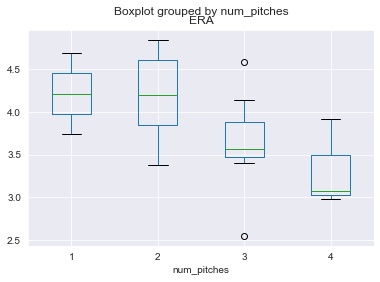

In [32]:
Elite_11_18 = Elite_11_18.reset_index()

Elite_11_18 = Elite_11_18.merge(coordEdge, on='pitcher_name')

Elite_11_18.boxplot('ERA', 'num_pitches')

In [33]:
y = Elite_11_18.ERA.values
X = sm.add_constant(Elite_11_18.num_pitches.values)

model = sm.OLS(y, X)

result = model.fit()

result.summary()

C:\Users\hym97\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     5.861
Date:                Thu, 01 Apr 2021   Prob (F-statistic):             0.0277
Time:                        13:12:08   Log-Likelihood:                -14.248
No. Observations:                  18   AIC:                             32.50
Df Residuals:                      16   BIC:                             34.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7731      0.414     11.543      0.000       3.896       5.650
x1            -0.3629      0.150     -2.421      0.028      -0.681      -0.045
==============================================================================
Omnibus:                        0.141   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.346
Skew:                          -0.120   Prob(JB):                        0.841
Kurtosis:                       2.365   Cond. No.                         9.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5.4.2 아웃확률 추정하기

In [34]:
atKbo_11_18_StatCast[['batter', 'events', 'description']].head(10)

,batter,events,description
0,425834.0,field_out,hit_into_play
1,150289.0,home_run,hit_into_play_score
2,150289.0,NaN,foul
3,150289.0,NaN,blocked_ball
4,150289.0,NaN,ball
5,150289.0,NaN,foul_tip
6,150289.0,NaN,ball
7,430632.0,field_out,hit_into_play
8,430632.0,NaN,ball
9,430632.0,NaN,ball


In [35]:
(atKbo_11_18_StatCast[['batter', 'events', 'description']].
 query('events.notnull()', engine='python').
 head(10))

,batter,events,description
0,425834.0,field_out,hit_into_play
1,150289.0,home_run,hit_into_play_score
7,430632.0,field_out,hit_into_play
10,446481.0,single,hit_into_play_no_out
12,446334.0,field_out,hit_into_play
15,116338.0,field_out,hit_into_play
19,110029.0,field_out,hit_into_play
25,435062.0,field_out,hit_into_play
29,488721.0,home_run,hit_into_play_score
31,430948.0,field_out,hit_into_play


In [36]:
def recordInning(key, dic):    
    if dic.get(key) == None :
        dic[key] = 1
    else :
        dic[key] += 1
    
    return dic
    

def getInningResult(df):
    batterCount = 0
    batterCountTemp = 0
    outs = ['out', 'out', 'out']
    inningDict = {}
    
    for idx in range(len(df)-1, -1, -1):
        batterCount += 1
        
        if 'out' in df.events.iloc[idx]:
            outs.pop()
        
        # out이 3번 나오면 기록
        if len(outs) == 0:
            _key = f'I_{batterCount - batterCountTemp}'
            inningDict = recordInning(_key, inningDict)
            batterCountTemp = batterCount
            
            if idx != 0 :
                outs = ['out', 'out', 'out']
            
    if len(outs) != 0:
        _key = f'I_{batterCount - batterCountTemp + len(outs)}'
        inningDict = recordInning(_key, inningDict)
    
    return pd.DataFrame(data = dict(sorted(inningDict.items())), index = [0])

In [37]:
MLB_11_18_InningSummary = (atKbo_11_18_StatCast.query('events.notnull()',
                                                      engine='python').
                           groupby(['pitcher_name', 'game_date']).
                           apply(getInningResult))

MLB_11_18_InningSummary.head()

I_6  I_7  I_4  I_5  I_8  I_3  I_12  I_10  I_9  \
pitcher_name game_date                                                     
니퍼트          2010-06-06 0  2.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-06-09 0  NaN  1.0  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-06-17 0  NaN  NaN  1.0  1.0  1.0  NaN   NaN   NaN  NaN   
             2010-06-23 0  1.0  1.0  1.0  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-06-30 0  1.0  NaN  1.0  NaN  NaN  1.0   NaN   NaN  NaN   

                           I_11  I_14  I_13  I_17  I_16  
pitcher_name game_date                                   
니퍼트          2010-06-06 0   NaN   NaN   NaN   NaN   NaN  
             2010-06-09 0   NaN   NaN   NaN   NaN   NaN  
             2010-06-17 0   NaN   NaN   NaN   NaN   NaN  
             2010-06-23 0   NaN   NaN   NaN   NaN   NaN  
             2010-06-30 0   NaN   NaN   NaN   NaN   NaN

In [38]:
MLB_11_18_InningSummary = (MLB_11_18_InningSummary.
                           groupby('pitcher_name').
                           sum()[sorted(MLB_11_18_InningSummary.columns)])

MLB_11_18_InningSummary.head()

,I_10,I_11,I_12,I_13,I_14,I_16,I_17,I_3,I_4,I_5,I_6,I_7,I_8,I_9
pitcher_name,,,,,,,,,,,,,,
니퍼트,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,14.0,2.0,6.0,3.0,1.0,0.0
다이아몬드,6.0,1.0,0.0,0.0,1.0,0.0,0.0,105.0,65.0,60.0,33.0,25.0,22.0,6.0
듀브론트,9.0,1.0,1.0,0.0,0.0,0.0,0.0,146.0,150.0,79.0,63.0,29.0,26.0,14.0
레나도,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26.0,25.0,15.0,9.0,10.0,3.0,1.0
레온,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,6.0,4.0,3.0,1.0,0.0


In [39]:
MLB_11_18_InningSummary = MLB_11_18_InningSummary.reset_index()

Elite_11_18_InningSummary = (MLB_11_18_InningSummary.
                             query('pitcher_name in @Elite_11_18.pitcher_name').
                             reset_index(drop = True))

Elite_11_18_InningSummary

,pitcher_name,I_10,I_11,I_12,I_13,I_14,I_16,I_17,I_3,I_4,I_5,I_6,I_7,I_8,I_9
0,니퍼트,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,14.0,2.0,6.0,3.0,1.0,0.0
1,다이아몬드,6.0,1.0,0.0,0.0,1.0,0.0,0.0,105.0,65.0,60.0,33.0,25.0,22.0,6.0
2,레이예스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,43.0,24.0,17.0,10.0,9.0,5.0
3,레일리,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,12.0,6.0,6.0,1.0,3.0,2.0
4,린드블럼,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,41.0,35.0,15.0,9.0,2.0,1.0
5,보우덴,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,49.0,12.0,21.0,6.0,2.0,1.0
6,샘슨,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,21.0,13.0,20.0,8.0,5.0,2.0
7,세든,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,13.0,11.0,6.0,4.0,3.0,1.0
8,소사,1.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,5.0,11.0,11.0,2.0,2.0,0.0
9,웨버,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,4.0,2.0,2.0,0.0


In [40]:
def makeC1(df):
    '''
    Parameters:
    -----------
    df: InningSummary
    
    Returns:
    --------
    pd.Series
        논문에서 정의한 C1 값
    '''
    return df.sum(axis = 1)

def makeC2(df):
    '''
    Parameters:
    -----------
    df: InningSummary
    
    Returns:
    --------
    pd.Series
        논문에서 정의한 C2 값
    '''
    return 3*(df['I_3'] + df['I_4'])

def makeC3(df):
    '''
    Parameters:
    -----------
    df: InningSummary
    
    Returns:
    --------
    pd.Series
        논문에서 정의한 C3 값
    '''
    output = 0
    for N in range(5,18):
        try:
            output += (N-3)*df[f'I_{N}']
        except:
            continue
    return output

def makeDelta(df):
    '''
    Parameters:
    -----------
    df: InningSummary with C1, C2, C3
    
    Returns:
    --------
    pd.Series
        논문에서 정의한 Delta 값
    '''
    Delta = ((-df['C1'] + df['C2'] + 2*df['C3']) + 
             ((df['C1'] - df['C2'] - 2*df['C3']).pow(2) + 
              4*df['C3']*(3*df['C1'] + df['C2'] + 3*df['C3'])).pow(0.5)) / \
    (2*(3*df['C1'] + df['C2'] + 3*df['C3']))
    return Delta

def makeOutProb(df):
    '''
    Parameters:
    -----------
    df: InningSummary
    
    Returns:
    --------
    pd.DataFrame
        InningSummary with C1, C2, C3, Delta, outProb
    '''
    df['C1']=makeC1(df)
    df['C2']=makeC2(df)
    df['C3']=makeC3(df)

    df['Delta'] = makeDelta(df)
    df['outProb'] = 1 - df['Delta']
    
    return df

In [41]:
Elite_11_18_InningSummary = makeOutProb(Elite_11_18_InningSummary)
Elite_11_18_InningSummary.sort_values('outProb', ascending = False)

,pitcher_name,I_10,I_11,I_12,I_13,I_14,I_16,I_17,I_3,I_4,I_5,I_6,I_7,I_8,I_9,C1,C2,C3,Delta,outProb
5,보우덴,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,49.0,12.0,21.0,6.0,2.0,1.0,128.0,258.0,127.0,0.586895,0.413105
4,린드블럼,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,41.0,35.0,15.0,9.0,2.0,1.0,157.0,285.0,167.0,0.591972,0.408028
7,세든,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,13.0,11.0,6.0,4.0,3.0,1.0,62.0,111.0,77.0,0.619771,0.380229
13,피가로,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,22.0,28.0,12.0,5.0,3.0,1.0,102.0,159.0,133.0,0.621519,0.378481
14,피어밴드,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0,0.0,1.0,1.0,0.0,10.0,18.0,13.0,0.628539,0.371461
0,니퍼트,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,14.0,2.0,6.0,3.0,1.0,0.0,35.0,66.0,48.0,0.640926,0.359074
16,헥터,6.0,4.0,0.0,0.0,0.0,0.0,0.0,123.0,96.0,75.0,44.0,33.0,9.0,7.0,397.0,657.0,575.0,0.644372,0.355628
10,윌슨,0.0,0.0,1.0,0.0,0.0,0.0,0.0,42.0,38.0,24.0,22.0,9.0,6.0,4.0,146.0,240.0,213.0,0.645420,0.354580
3,레일리,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,12.0,6.0,6.0,1.0,3.0,2.0,41.0,69.0,61.0,0.650185,0.349815
2,레이예스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,43.0,24.0,17.0,10.0,9.0,5.0,142.0,231.0,214.0,0.651042,0.348958


In [42]:
edgePitches_19 = \
(atKbo_19_StatCast.query(
    '(plate_x >= 0.8 & plate_x <= 1.2 & plate_z <= 3.7 & plate_z >= 1.3) | \
     (plate_x <= -0.8 & plate_x >= -1.2 & plate_z <= 3.7 & plate_z >= 1.3) | \
     (plate_x >= -0.8 & plate_x <= 0.8 & plate_z <= 1.7 & plate_z >= 1.3) | \
     (plate_x >= -0.8 & plate_x <= 0.8 & plate_z <= 3.7 & plate_z >= 3.3)').
 query('pitch_name.notnull()', engine='python').
 query('description == "called_strike"'))

coordEdge_19 = \
(edgePitches_19[['pitcher_name', 'pitch_name', 'game_date']].
 groupby(['pitcher_name', 'pitch_name']).
 count().
 groupby('pitcher_name').
 apply(lambda x : x / x.sum()).
 query('game_date >= 0.1').
 groupby('pitcher_name').
 count())

MLB_19_InningSummary = (atKbo_19_StatCast.query('events.notnull()', engine = 'python').
                        groupby(['pitcher_name', 'game_date']).
                        apply(getInningResult))

MLB_19_InningSummary = (MLB_19_InningSummary.
                        groupby('pitcher_name').
                        sum()[sorted(MLB_19_InningSummary.columns)])

MLB_19_InningSummary = MLB_19_InningSummary.reset_index()

MLB_19_InningSummary = makeOutProb(MLB_19_InningSummary)
MLB_19_InningSummary.sort_values('outProb', ascending=False)

,pitcher_name,I_10,I_11,I_12,I_13,I_15,I_3,I_4,I_5,I_6,I_7,I_8,I_9,C1,C2,C3,Delta,outProb
3,서폴드,0.0,1.0,0.0,0.0,0.0,38.0,31.0,28.0,16.0,7.0,3.0,1.0,125.0,207.0,161.0,0.622278,0.377722
0,루친스키,1.0,0.0,0.0,0.0,0.0,24.0,11.0,14.0,7.0,1.0,3.0,2.0,63.0,105.0,87.0,0.635756,0.364244
5,요키시,0.0,0.0,0.0,0.0,0.0,4.0,3.0,4.0,3.0,0.0,0.0,1.0,15.0,21.0,23.0,0.648073,0.351927
12,헤일리,0.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0,3.0,2.0,2.0,0.0,28.0,39.0,43.0,0.648175,0.351825
6,윌랜드,1.0,0.0,0.0,0.0,0.0,20.0,11.0,6.0,7.0,5.0,3.0,1.0,54.0,93.0,81.0,0.652780,0.347220
10,터너,4.0,3.0,0.0,0.0,1.0,105.0,89.0,71.0,51.0,22.0,16.0,8.0,370.0,582.0,575.0,0.655363,0.344637
1,맥과이어,0.0,0.0,0.0,0.0,0.0,14.0,13.0,9.0,6.0,3.0,3.0,4.0,52.0,81.0,87.0,0.668831,0.331169
4,알칸타라,0.0,0.0,0.0,1.0,0.0,15.0,8.0,8.0,9.0,3.0,3.0,0.0,47.0,69.0,80.0,0.669846,0.330154
8,켈리,1.0,2.0,1.0,0.0,0.0,23.0,20.0,18.0,8.0,9.0,2.0,1.0,85.0,129.0,144.0,0.670181,0.329819
11,톰슨,0.0,0.0,1.0,0.0,0.0,31.0,29.0,15.0,13.0,12.0,7.0,5.0,113.0,180.0,191.0,0.671605,0.328395


In [43]:
coordEdge_19 = coordEdge_19.reset_index().rename(columns={'game_date':'num_pitches'})

coordEdge_19.sort_values('num_pitches', ascending = False)

,pitcher_name,num_pitches
0,루친스키,4
7,채드벨,4
9,쿠에바스,4
1,맥과이어,3
3,서폴드,3
4,알칸타라,3
5,요키시,3
8,켈리,3
10,터너,3
11,톰슨,3


# 5.5 성능 향상을 위한 방법

## 5.5.1 볼 배합 지표

In [44]:
atKbo_11_18_StatCast = pd.read_csv("C://users/hym97/스카우트/baseball_savant_foreigners_2011_2018.csv")

atKbo_11_18_StatCast.head(10)

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,...,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name
0,2010-10-09,93.0,425834.0,430962,field_out,hit_into_play,4.0,R,R,popup,...,-0.626,2.771,-6.404,26.077,-9.694,NaN,NaN,NaN,4-Seam Fastball,니퍼트
1,2010-10-09,95.2,150289.0,430962,home_run,hit_into_play_score,5.0,L,R,fly_ball,...,-0.112,2.401,-10.168,28.786,-8.895,NaN,NaN,NaN,4-Seam Fastball,니퍼트
2,2010-10-09,94.3,150289.0,430962,NaN,foul,2.0,L,R,NaN,...,0.272,3.052,-5.605,26.657,-7.794,NaN,NaN,NaN,4-Seam Fastball,니퍼트
3,2010-10-09,94.0,150289.0,430962,NaN,blocked_ball,13.0,L,R,NaN,...,-1.193,0.632,-9.099,30.273,-6.371,NaN,NaN,NaN,4-Seam Fastball,니퍼트
4,2010-10-09,92.8,150289.0,430962,NaN,ball,14.0,L,R,NaN,...,0.370,1.383,-5.846,27.290,-11.262,NaN,NaN,NaN,4-Seam Fastball,니퍼트
5,2010-10-09,80.8,150289.0,430962,NaN,foul_tip,13.0,L,R,NaN,...,-1.233,2.059,-10.897,18.539,-20.286,NaN,NaN,NaN,Changeup,니퍼트
6,2010-10-09,92.0,150289.0,430962,NaN,ball,9.0,L,R,NaN,...,0.510,1.722,-6.251,27.786,-10.031,NaN,NaN,NaN,4-Seam Fastball,니퍼트
7,2010-10-09,92.5,430632.0,430962,field_out,hit_into_play,13.0,L,R,line_drive,...,-1.010,2.212,-8.279,26.466,-8.376,NaN,NaN,NaN,4-Seam Fastball,니퍼트
8,2010-10-09,91.2,430632.0,430962,NaN,ball,13.0,L,R,NaN,...,-0.106,1.418,-9.239,25.490,-13.556,NaN,NaN,NaN,4-Seam Fastball,니퍼트
9,2010-10-09,91.8,430632.0,430962,NaN,ball,11.0,L,R,NaN,...,-1.426,2.971,-12.090,25.659,-15.250,NaN,NaN,NaN,2-Seam Fastball,니퍼트


In [45]:
def Compute_Distance(x1,y1,x2,y2):
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5
    

def Mean_Distance_Per_Batter(df):
    if df.shape[0] == 1 :
        return np.nan
    
    distances = []
    for i in range(df.shape[0]-1, 0, -1):
        distance = Compute_Distance(df['plate_x'].iloc[i], df['plate_z'].iloc[i],
                                    df['plate_x'].iloc[i-1], df['plate_z'].iloc[i-1])
        distances.append(distance)
        
    return np.mean(distances)

In [46]:
MDPB = atKbo_11_18_StatCast.groupby(
    ['pitcher_name', 'batter']).apply(Mean_Distance_Per_Batter)
MDPB

pitcher_name  batter  
니퍼트           110029.0    1.418679
              113028.0    1.262822
              116338.0    1.475932
              121347.0    1.922868
              123173.0    1.306911
                            ...   
휠러            543807.0    1.312943
              545350.0    3.023675
              594828.0         NaN
              608324.0    1.542978
              621043.0         NaN
Length: 11263, dtype: float64

In [47]:
pitch_mix = MDPB.dropna().groupby('pitcher_name').mean()
pitch_mix.head()

pitcher_name
니퍼트      1.431813
다이아몬드    1.408325
듀브론트     1.469793
레나도      1.501783
레온       1.529366
dtype: float64

In [48]:
Elite_11_18['PMI'] = pitch_mix[Elite_11_18.pitcher_name].values
Elite_11_18

,index,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born,num_pitches,PMI
0,0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN,3,1.431813
1,8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN,2,1.408325
2,12,레이예스,2013,SK,4.84,751,157,15,91,7,135,NaN,2,1.449854
3,14,레일리,2015,롯데,3.91,768,182,20,57,15,134,1988년 06월 29일,4,1.505396
4,25,린드블럼,2015,롯데,3.56,861,196,28,52,12,180,1987년 06월 15일,3,1.506041
5,37,보우덴,2016,두산,3.80,742,159,17,54,6,160,NaN,2,1.495359
6,43,샘슨,2018,한화,4.68,703,144,17,79,5,195,NaN,1,1.503132
7,45,세든,2013,SK,2.98,780,169,14,73,11,160,NaN,4,1.482919
8,48,소사,2012,KIA,3.54,614,137,9,39,8,104,NaN,3,1.526452
9,67,웨버,2014,NC,4.58,512,132,13,42,3,85,NaN,3,1.431382


In [49]:
y = Elite_11_18.ERA.values
X = sm.add_constant(Elite_11_18[['num_pitches', 'PMI']].values)

model = sm.OLS(y, X)

result = model.fit()

result.summary()

C:\Users\hym97\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     5.365
Date:                Thu, 01 Apr 2021   Prob (F-statistic):             0.0175
Time:                        13:14:33   Log-Likelihood:                -12.201
No. Observations:                  18   AIC:                             30.40
Df Residuals:                      15   BIC:                             33.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0464      2.216      4.082      0.001       4.322      13.770
x1            -0.4438      0.144     -3.077      0.008      -0.751      -0.136
x2            -2.7600      1.410     -1.957      0.069      -5.766       0.246
==============================================================================
Omnibus:                        2.157   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.340   Jarque-Bera (JB):                0.664
Skew:                          -0.351   Prob(JB):                        0.717
Kurtosis:                       3.627   Cond. No.                         69.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
MDPB_19 = atKbo_19_StatCast.groupby(['pitcher_name', 'batter']). \
    apply(Mean_Distance_Per_Batter)
pitch_mix_19 = MDPB_19.dropna().groupby('pitcher_name').mean()
pitch_mix_19.head()

pitcher_name
루친스키    1.508374
맥과이어    1.412896
버틀러     1.469185
서폴드     1.510175
알칸타라    1.382733
dtype: float64

In [51]:
coordEdge_19['PMI'] = pitch_mix_19[coordEdge_19.pitcher_name].values
coordEdge_19

,pitcher_name,num_pitches,PMI
0,루친스키,4,1.508374
1,맥과이어,3,1.412896
2,버틀러,2,1.469185
3,서폴드,3,1.510175
4,알칸타라,3,1.382733
5,요키시,3,1.476024
6,윌랜드,2,1.497783
7,채드벨,4,1.446687
8,켈리,3,1.483089
9,쿠에바스,4,1.503062


In [52]:
test_X = sm.add_constant(coordEdge_19[['num_pitches', 'PMI']].values)
coordEdge_19['pred'] = result.predict(test_X)
coordEdge_19.sort_values('pred')

,pitcher_name,num_pitches,PMI,pred
0,루친스키,4,1.508374,3.108067
9,쿠에바스,4,1.503062,3.122727
11,톰슨,3,1.609576,3.272562
7,채드벨,4,1.446687,3.278323
12,헤일리,3,1.576976,3.362537
3,서폴드,3,1.510175,3.546906
8,켈리,3,1.483089,3.621663
5,요키시,3,1.476024,3.641163
10,터너,3,1.443403,3.731196
1,맥과이어,3,1.412896,3.815397


## 5.5.2 배럴 타구 허용 비율

In [53]:
def countBarrelPitches(df):    
    lower = 26
    upper = 30

    QL = []

    for mph in range(98, int(df.launch_speed.max())+1):
        if mph <= 115:
            QL.append(df.query(f'(launch_speed >= {mph} & launch_speed < {mph+1}) & \
                                 (launch_angle >= {lower} & launch_angle <= {upper})'))
            lower -= 1
            upper += 20/18

        else:
            QL.append(df.query(f'(launch_speed >= {mph} & launch_speed < {mph+1}) & \
                                 (launch_angle >= {lower} & launch_angle <= {upper})'))

    BarrelPitches = (pd.concat(QL, axis = 0).
                     groupby('pitcher_name')['game_date'].
                     count().
                     reset_index())
    BarrelPitches = BarrelPitches.rename({'game_date':'barrel_pitches'}, axis = 1)
    
    return BarrelPitches

In [54]:
countBarrelPitches(atKbo_19_StatCast).head()

,pitcher_name,barrel_pitches
0,루친스키,9
1,맥과이어,16
2,버틀러,57
3,서폴드,26
4,알칸타라,18


In [55]:
def countTotalPitches(df):
    TotalPitches = df.groupby('pitcher_name')['game_date'].count().reset_index()
    TotalPitches = TotalPitches.rename({'game_date':'total_pitches'}, axis = 1)
    
    return TotalPitches

countTotalPitches(atKbo_19_StatCast).head()

,pitcher_name,total_pitches
0,루친스키,930
1,맥과이어,925
2,버틀러,4454
3,서폴드,1860
4,알칸타라,824


In [56]:
def getBarrelRatio(df): 
    BarrelPitches_result = countBarrelPitches(df)
    TotalPitches_result = countTotalPitches(df)
    
    pitches = pd.merge(BarrelPitches_result, TotalPitches_result, on='pitcher_name',
                       how='right')
    pitches = pitches.fillna(0)
    pitches['barrel_ratio'] = pitches['barrel_pitches'] / pitches['total_pitches']
    return pitches.sort_values('barrel_ratio')

In [57]:
Stat19notnull = atKbo_19_StatCast[atKbo_19_StatCast.launch_speed.notnull() & \
                                  atKbo_19_StatCast.launch_angle.notnull()]
getBarrelRatio(Stat19notnull)

,pitcher_name,barrel_pitches,total_pitches,barrel_ratio
11,헤일리,6,154,0.038961
0,루친스키,9,226,0.039823
2,버틀러,57,1215,0.046914
3,서폴드,26,554,0.046931
10,톰슨,28,561,0.049911
7,켈리,14,280,0.050000
1,맥과이어,16,263,0.060837
6,채드벨,24,377,0.063660
8,쿠에바스,8,120,0.066667
9,터너,26,372,0.069892
